In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from asy import *

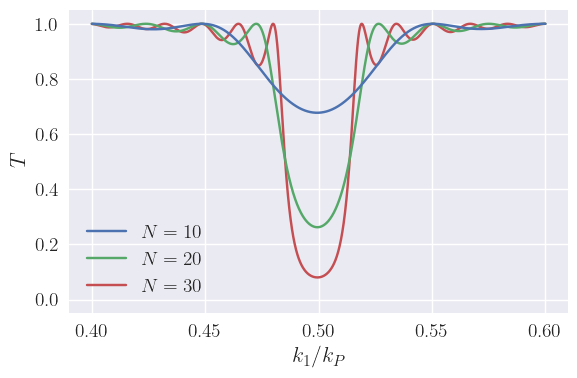

In [2]:
lamb_p = 0.75
kp = 2*np.pi/lamb_p

k1 = np.linspace(0.4, 0.6, 2000) * kp

n1 = 1.50
n2 = 1.60
neff = 2*n1*n2/(n1+n2)
Lamb = 1 * lamb_p / neff

T1 = np.zeros(k1.size)
T2 = np.zeros(k1.size)
T3 = np.zeros(k1.size)

for i in range(k1.size):
    T1[i] = calculate_transmission(tm_stack(0, n1*k1[i], n2*k1[i], Lamb, N_layers=10))
    T2[i] = calculate_transmission(tm_stack(0, n1*k1[i], n2*k1[i], Lamb, N_layers=20))
    T3[i] = calculate_transmission(tm_stack(0, n1*k1[i], n2*k1[i], Lamb, N_layers=30))

plt.style.use('seaborn-v0_8')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14,
})

fig, ax = plt.subplots(figsize=[6, 4])

ax.plot(k1/kp, T1, label=r'$N = 10$', zorder=3)
ax.plot(k1/kp, T2, label=r'$N = 20$', zorder=2)
ax.plot(k1/kp, T3, label=r'$N = 30$', zorder=1)

ax.legend(fontsize=14)

ax.set_xlabel(r'$k_1/k_P$', size=16)
ax.set_ylabel(r"$T$", size=16)

ax.set_ylim(-0.05, 1.05)

fig.tight_layout()

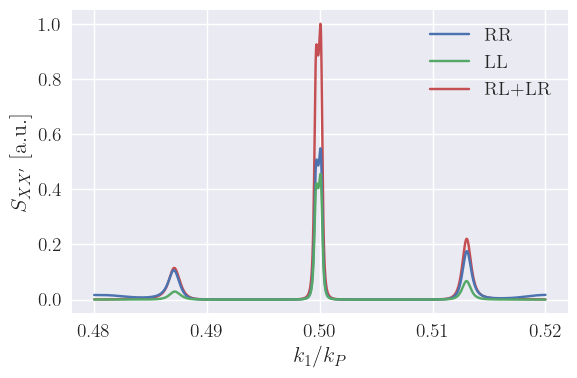

In [3]:
n = [2.18, 2.15, 2.19]
ng = [2.28, 2.18, 2.32]

L_cavity = 9.98

lamb_p = 0.75
kp = 2*np.pi/lamb_p

k1 = np.linspace(0.48, 0.52, 2000) * kp

n1 = 1.50
n2 = 1.60
neff = 2*n1*n2/(n1+n2)
Lamb = 1 * lamb_p / neff
N = 30
bragg_params = (n1, n2, Lamb, N)

J = calculate_J_sfwm_bg(k1, kp, L_cavity, n, ng, bragg_params)

sig = 0.04*kp/2
eta = np.exp(-0.5*(k1-kp/2)**2/sig**2)

C0 = np.abs(J[0])**2*eta
C1 = np.abs(J[1])**2*eta
C2 = np.abs(J[2])**2*eta
C3 = np.abs(J[3])**2*eta

plt.style.use('seaborn-v0_8')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "font.size": 14,
})

fig, ax = plt.subplots(figsize=[6, 4])

ax.plot(k1/kp, C0/(C2+C3).max(), label='RR', zorder=2)
ax.plot(k1/kp, C1/(C2+C3).max(), label='LL', zorder=3)
ax.plot(k1/kp, (C2+C3)/(C2+C3).max(), label='RL+LR', zorder=1)

ax.legend(fontsize=14)

ax.set_xlabel(r'$k_1/k_P$', size=16)
ax.set_ylabel(r"$S_{X X'}$ [a.u.]", size=16)

fig.tight_layout()